In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [28]:
#x=np.array([5.86,2.93,1.465,0.7325,0.36625,0.183125,0.091563,0.045781,0.022891,0.011445,0.005723,0])
#y=np.array([91523.7,90715.8,87582.3,71583.8,51311,34180.9,30596.2,29253.2,30259.8,26771.3,26320.3,25208.3])

x=np.array([400,133.3333333,44.44444444,14.81481481,4.938271605,1.646090535,0.548696845,0.182898948,0.060966316,0.020322105,0.0067740350,0])
y=np.array([90789.0,102172.4667,89830.43333,72608.56667,55563.96667,31565.4,23711.1,22009.26667,21549.7,21397.53333,21825.3,22435.86667
])

In [18]:
def gfp_fit_v1(x, Zmax, Keff, neff, beta):
    gfp=Zmax*(x/Keff)**neff/(1.0+(x/Keff)**neff)+beta
    return gfp

def gfp_fit_v2(x,Zmax,K1,m1,beta,C):
    gfp=Zmax*(x/K1)**m1/(1+(x/K1)**m1+C)/(1+C)+beta
    return gfp

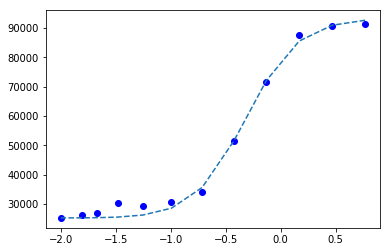

[  6.81340513e+04   4.72786433e-01   1.81022988e+00   2.52083000e+04]


In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.log10(x+1e-2),y,'bo')
params,params_cov=optimize.curve_fit(gfp_fit_v1,x,y,p0=[92000.0,20.0,0.0,0.0],bounds=([0,0,0,0],[np.inf,np.inf,np.inf,y[-1]]))
ax.plot(np.log10(x+1e-2),gfp_fit_v1(x,params[0],params[1],params[2],params[3]),ls='--')
plt.show()
print(params)

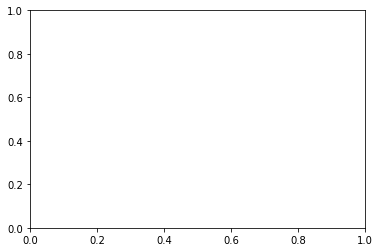

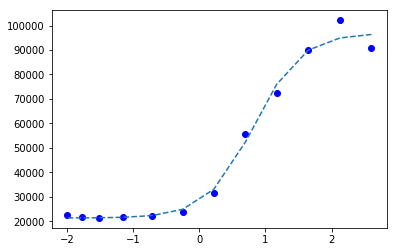

('Zmax:', 99085.783743110369, 'K1:', 5.3437151081503034, 'm1:', 1.2097967462999133, 'beta:', 21344.236924635861, 'C:', 0.31149576033506932)


In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.log10(x+1e-2),y,'bo')
params,params_cov=optimize.curve_fit(gfp_fit_v2,x,y,p0=[100000.0,20.0,0.0,0.0,0.0],bounds=([0,0,0,0,0],[np.inf,np.inf,np.inf,np.inf,y[-1]]))
ax.plot(np.log10(x+1e-2),gfp_fit_v2(x,params[0],params[1],params[2],params[3],params[4]),ls='--')
plt.show()
print("Zmax:",params[0],"K1:",params[1],"m1:",params[2],"beta:",params[3],"C:",params[4])